In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\muthuraj.jayaseelan\diabetes.csv")


In [2]:
df.shape

(768, 9)

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
y = df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
x = df.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
clr = LogisticRegression(max_iter=1000)
clr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_predict = clr.predict(x_test)
datasetComparison = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
print(datasetComparison)

     Actual  Predicted
661       1          1
122       0          0
113       0          0
14        1          1
529       0          0
..      ...        ...
476       1          0
482       0          0
230       1          1
527       0          0
380       0          0

[154 rows x 2 columns]


In [30]:
#Generate confusion matrix

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predict)
print(cf_matrix)

[[98  9]
 [18 29]]


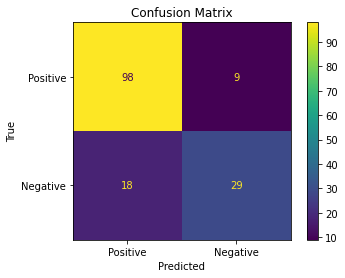

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cf_matrix,display_labels=["Positive","Negative"])
disp.plot()
disp.ax_.set(xlabel='Predicted', ylabel='True')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [51]:
#accuarcy level
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_predict)
print(accuracy)

0.8246753246753247


In [55]:
from sklearn.metrics import classification_report
target_names = ['Positive', 'Negative']
print(classification_report(y_test,y_predict, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.84      0.92      0.88       107
    Negative       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

